In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()
today = date.today()
today

datetime.date(2023, 6, 30)

In [2]:
sql = "SELECT C.id, C.name AS item, G.name AS kind, G.id FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,id,item,kind,id
0,1,Books & Software,Edutainment,3
1,2,CCF,Luxury,5
2,3,Cigarette,Luxury,5
3,4,Food,Food,4
4,5,Fuel,Transportation,10


In [3]:
# create a date object
date = pd.to_datetime('2023-06-30')

# find the beginning of the month for the given date
bom = date.to_period('M').start_time
eom = date.to_period('M').end_time
bom = bom.date()
eom = eom.date()
print(f'Month start: {bom}')
print(f'Month end: {eom}')

Month start: 2023-06-01
Month end: 2023-06-30


In [4]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)

df = pd.read_sql(sql, conn)
df


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-06-30" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-06-30,10000,Parent,Parent
1,2023-06-30,1050,MidJourney,Edutainment
2,2023-06-30,710,ChatGPT,Edutainment
3,2023-06-30,640,Internet Home,Communication
4,2023-06-30,540,Telephone Dtac,Communication
5,2023-06-30,420,Netflix,Edutainment
6,2023-06-30,170,Google,Edutainment
7,2023-06-30,150,Apple,Edutainment
8,2023-06-30,40,Apple,Edutainment


In [5]:
df.amount.sum()

13720

In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)

df_eom = pd.read_sql(sql, conn)
df_eom


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-06-30" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-06-30,10000,Parent,Parent
1,2023-06-30,1050,MidJourney,Edutainment
2,2023-06-30,710,ChatGPT,Edutainment
3,2023-06-30,640,Internet Home,Communication
4,2023-06-30,540,Telephone Dtac,Communication
5,2023-06-30,420,Netflix,Edutainment
6,2023-06-30,170,Google,Edutainment
7,2023-06-30,150,Apple,Edutainment
8,2023-06-30,40,Apple,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)

df_t = pd.read_sql(sql, conn)
df_t.head()


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2023-06-01" AND "2023-06-30" 
ORDER BY date



,date,amount,item,kind
0,2023-06-03,100,Food,Food
1,2023-06-03,3740,Pets,Pets
2,2023-06-05,100,Food,Food
3,2023-06-05,9150,Pets,Pets
4,2023-06-06,90,Food,Food


In [8]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple               190
ChatGPT             710
Food               2170
Fuel               1300
Google              170
Internet Home       640
Merit Making       3000
MidJourney         1050
Netflix             420
Parent            10000
Pets              22900
Telephone Dtac      540
Name: amount, dtype: int64

In [9]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication      1180
Edutainment        2540
Food               2170
Others             3000
Parent            10000
Pets              22900
Transportation     1300
Name: amount, dtype: int64

In [10]:
expense = grouped.amount.sum()
sum(expense)

43090

<Figure size 864x864 with 0 Axes>

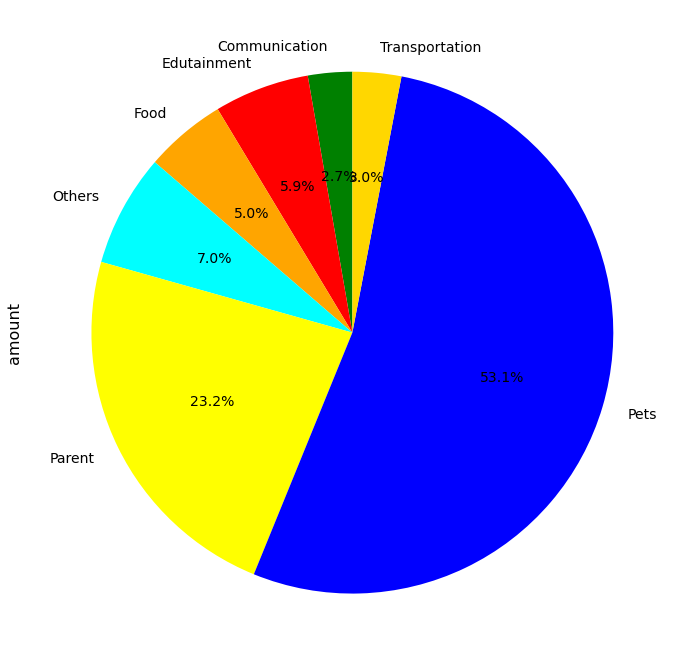

In [11]:
fig_path = "../fig/Expense-2306.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [12]:
expense.to_csv("../data/expense-2306.csv")

In [13]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-06-30" 
ORDER BY date



In [14]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [15]:
df_tmp.to_csv("../data/expense-eom.csv")